

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 


 # **<span style="color:#6daa9f;">TABLE OF CONTENTS</span>**
 

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA ANALYSIS**

**DATA PREPROCESSING**

**MODEL BUILDING**

**CONCLUSIONS**

# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape

(299, 13)

In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<AxesSubplot:>

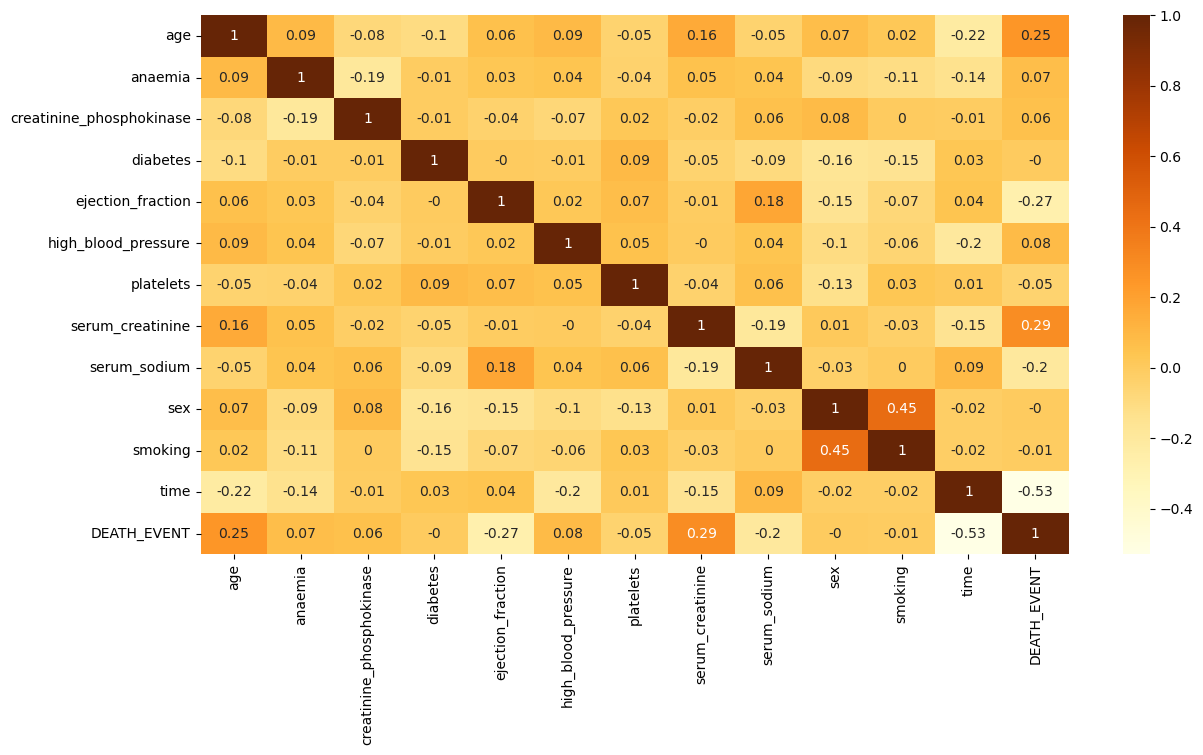

In [6]:
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

<AxesSubplot:xlabel='count', ylabel='age'>

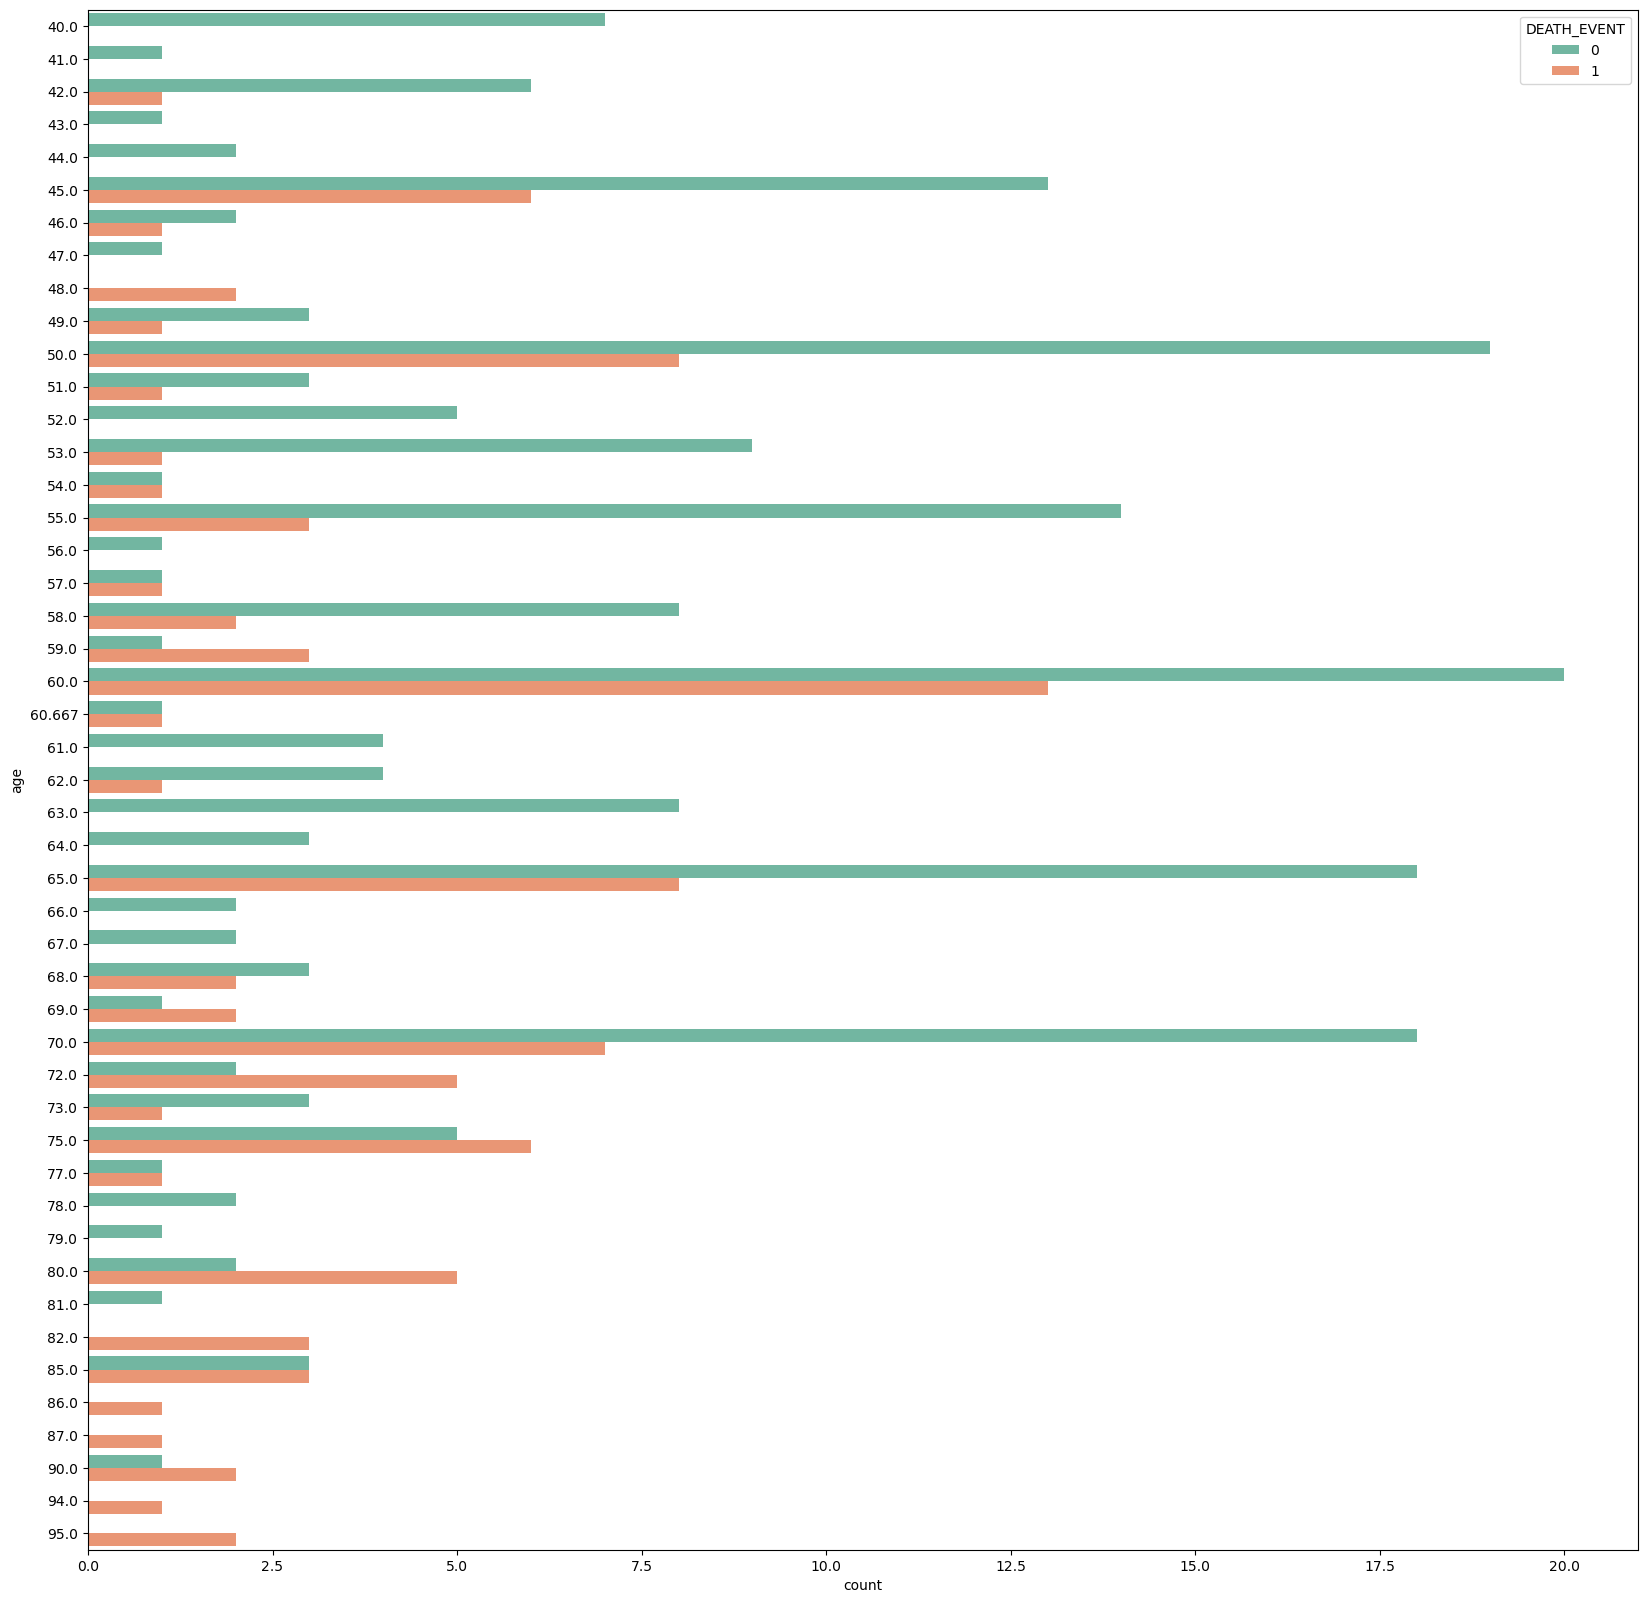

In [7]:
plt.figure(figsize = (20,20))
sns.countplot(y = 'age', palette='Set2',hue='DEATH_EVENT',data = data)

<AxesSubplot:xlabel='time', ylabel='Count'>

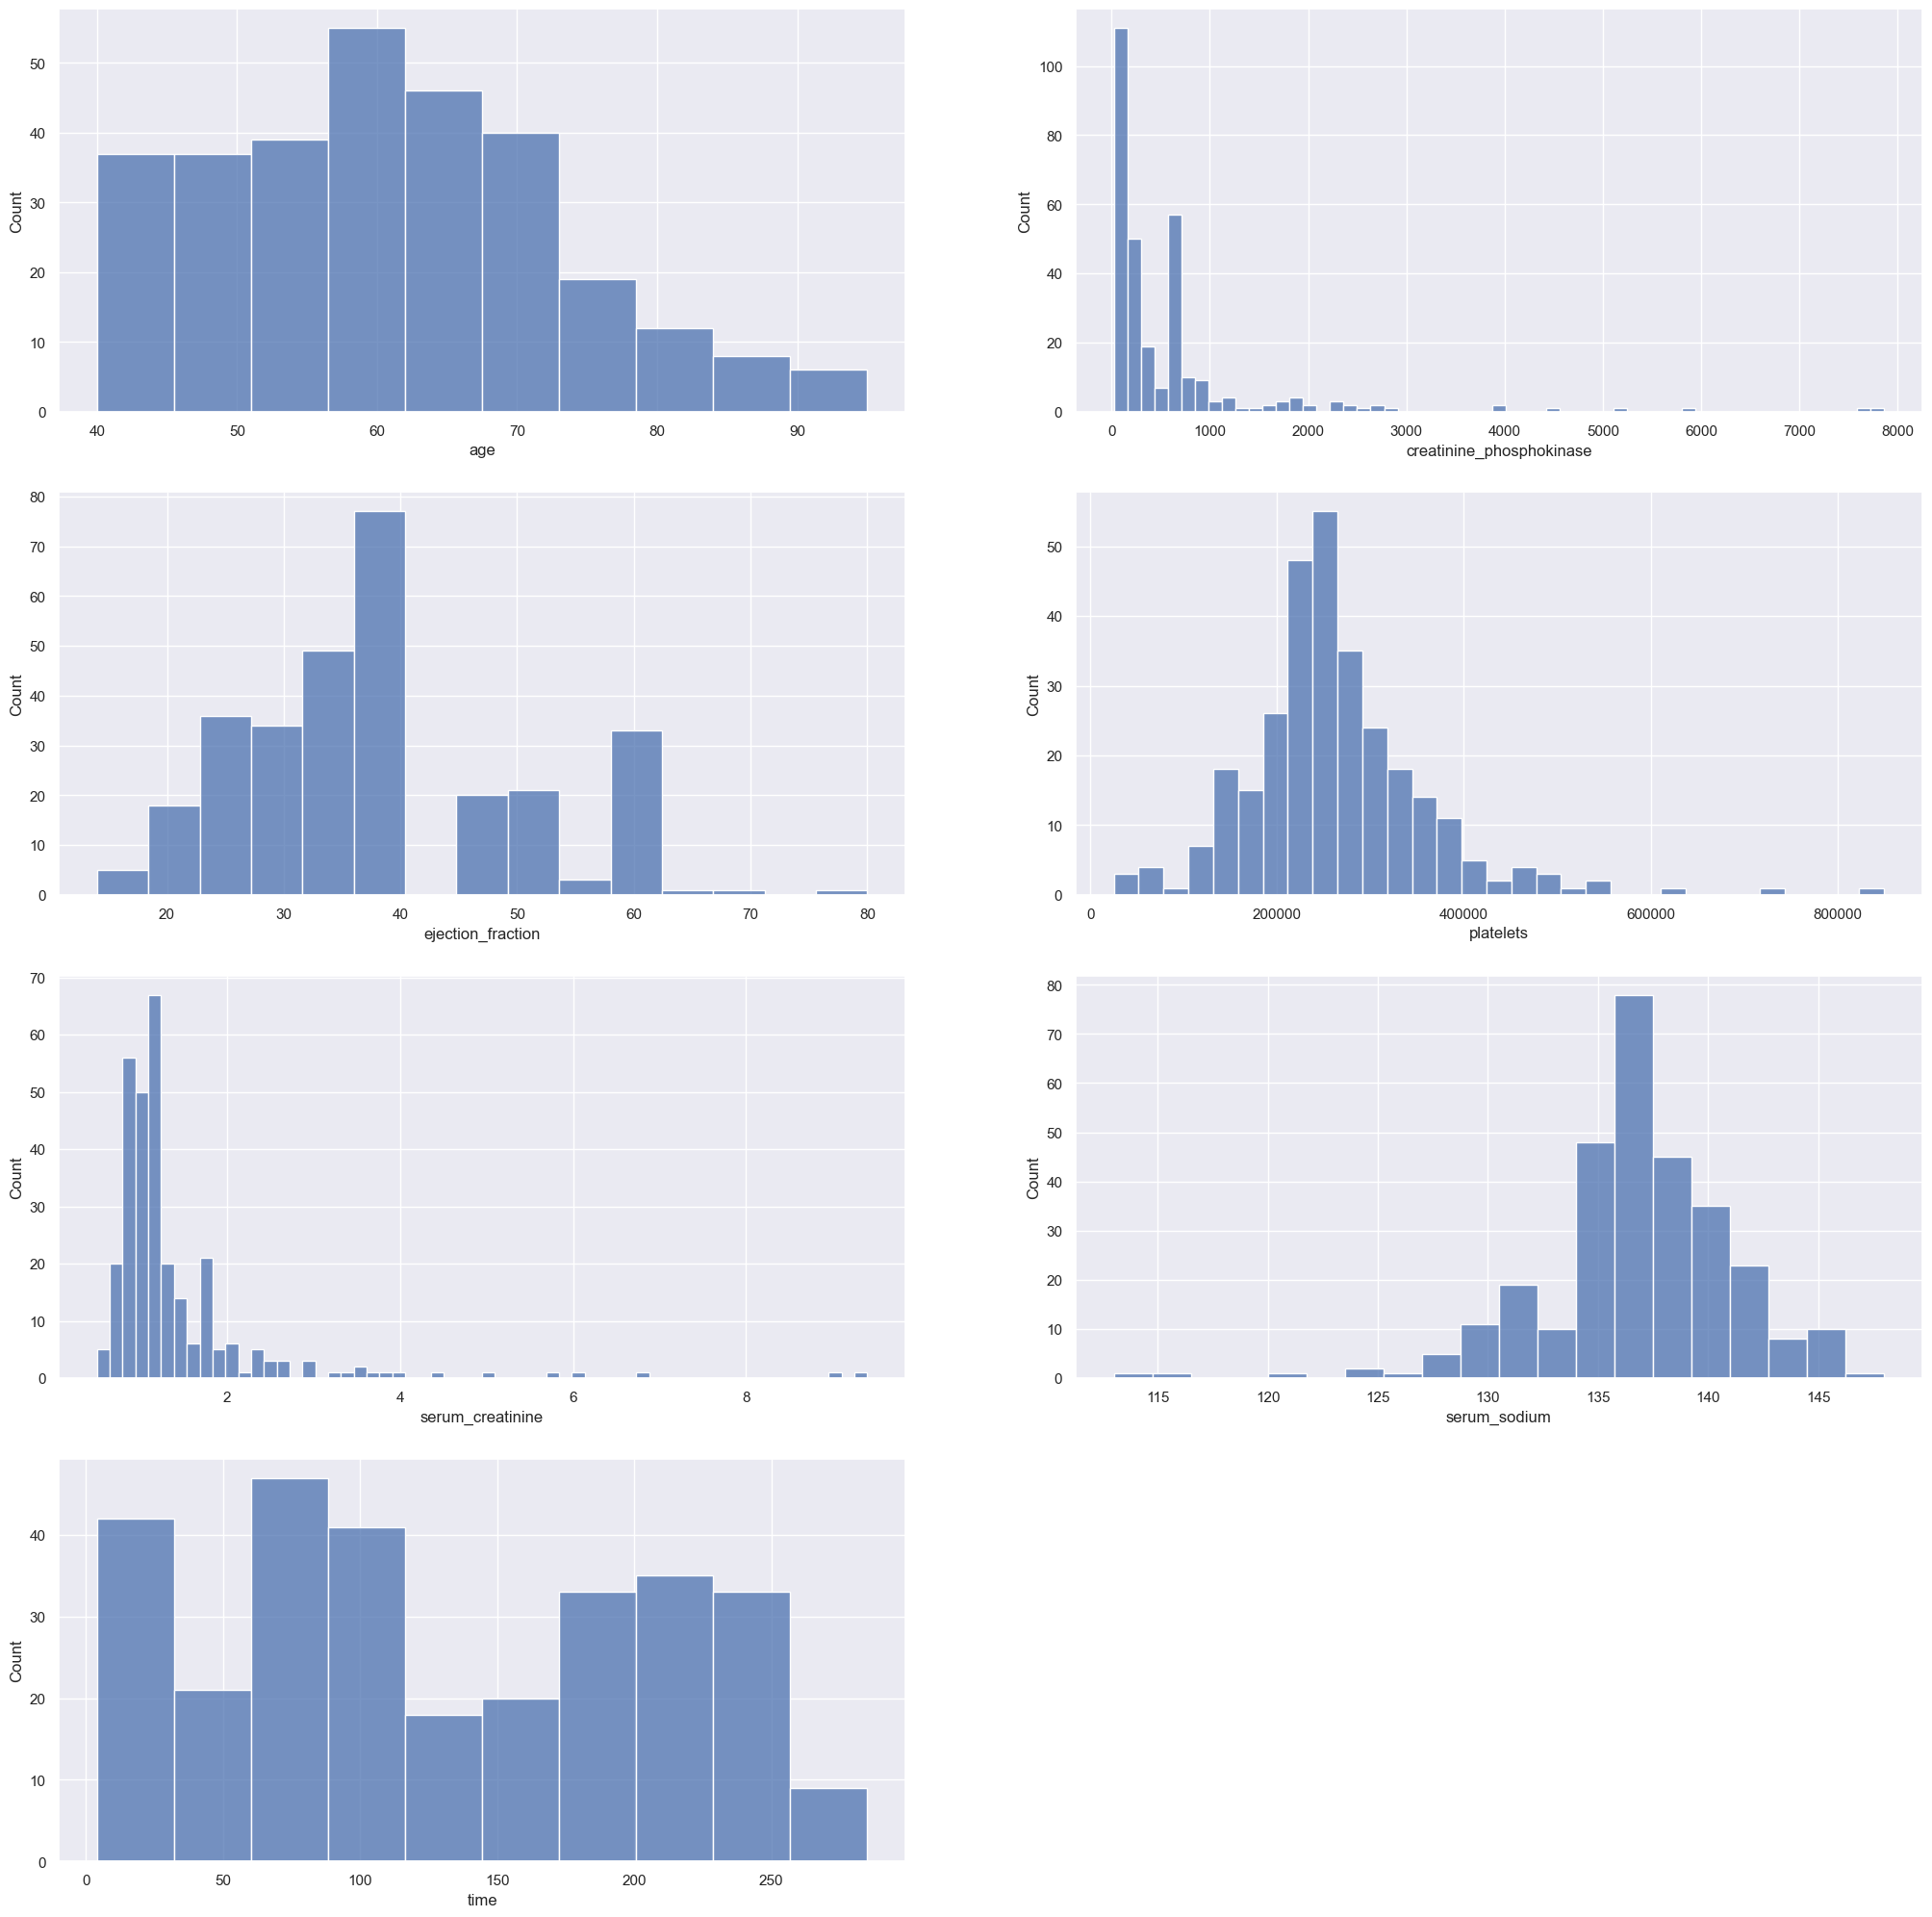

In [8]:
plt.figure(figsize = (25,25))

sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(data['age'], kde = False)

plt.subplot(4,2,2)
sns.histplot(data['creatinine_phosphokinase'], kde = False)

plt.subplot(4,2,3)
sns.histplot(data['ejection_fraction'], kde = False)

plt.subplot(4,2,4)
sns.histplot(data['platelets'], kde = False)

plt.subplot(4,2,5)
sns.histplot(data['serum_creatinine'], kde = False)

plt.subplot(4,2,6)
sns.histplot(data['serum_sodium'], kde = False)

plt.subplot(4,2,7)
sns.histplot(data['time'], kde = False)





<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

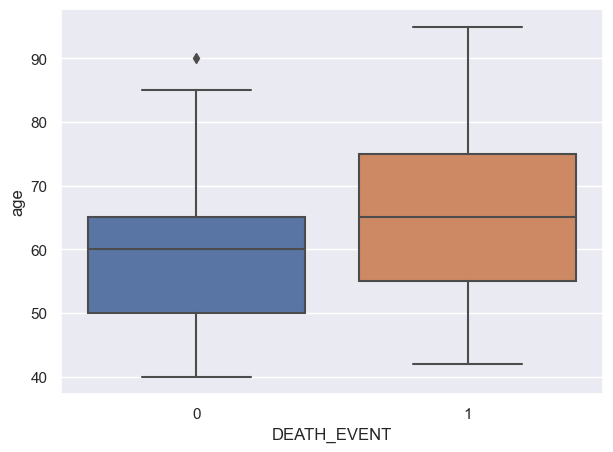

In [9]:
plt.figure(figsize = (7, 5))
sns.boxplot(x="DEATH_EVENT", y="age", data=data)

<AxesSubplot:xlabel='age', ylabel='time'>

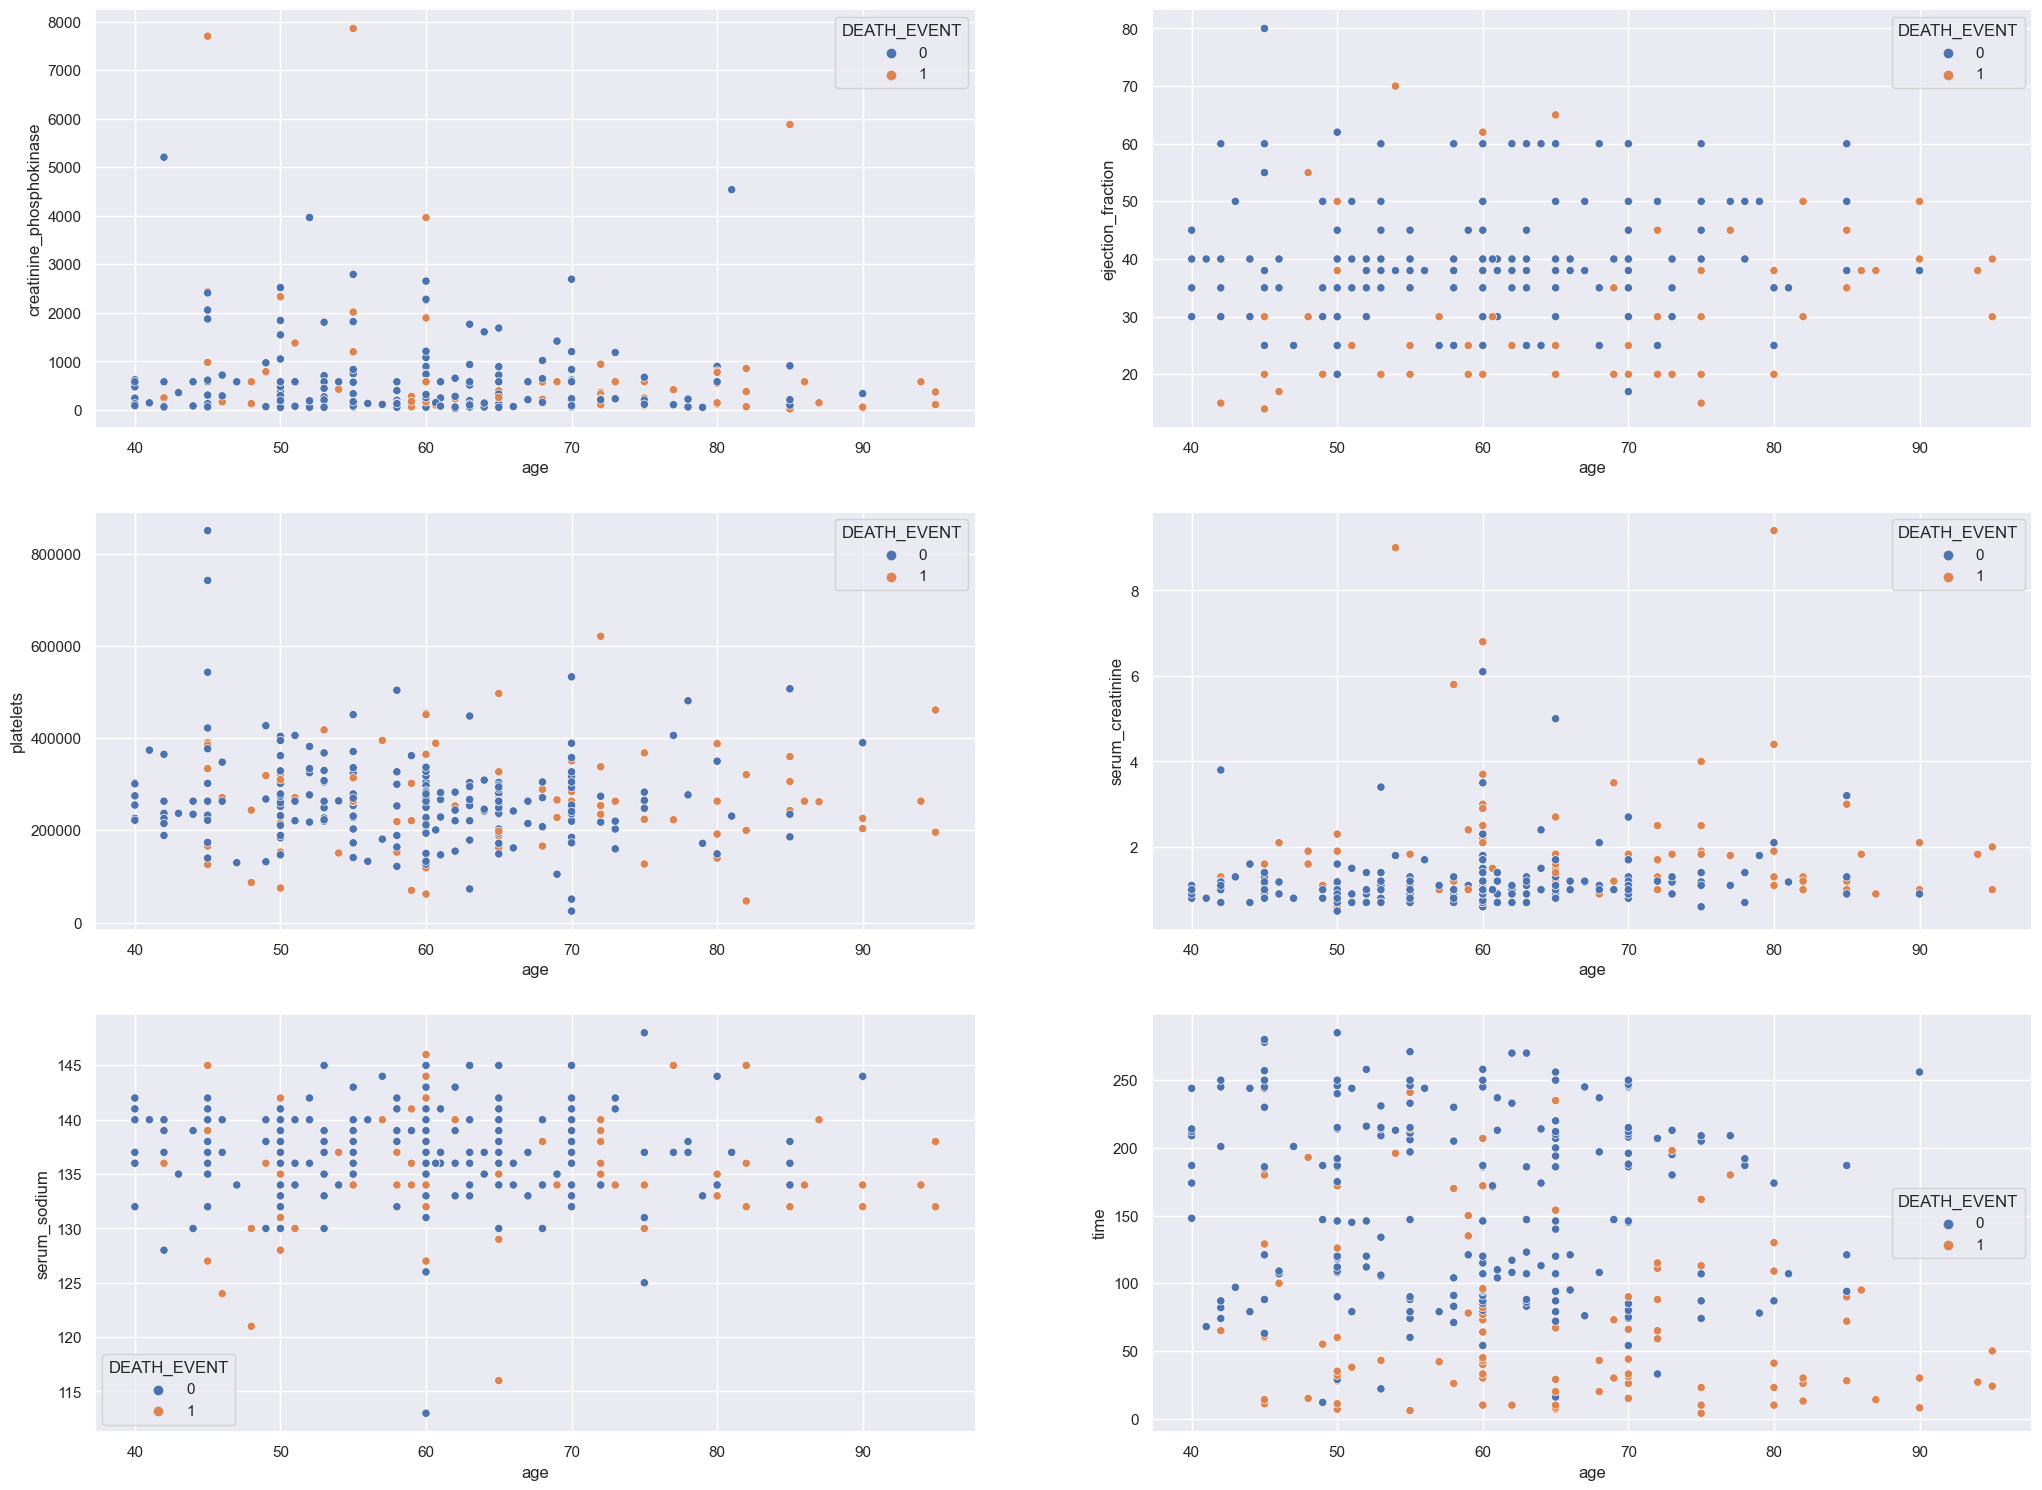

In [138]:
plt.figure(figsize = (25,25))

sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.scatterplot(data=data,x='age',y='creatinine_phosphokinase',hue='DEATH_EVENT')

plt.subplot(4,2,2)
sns.scatterplot(data=data,x='age',y='ejection_fraction',hue='DEATH_EVENT')


plt.subplot(4,2,3)
sns.scatterplot(data=data,x='age',y='platelets',hue='DEATH_EVENT')


plt.subplot(4,2,4)
sns.scatterplot(data=data,x='age',y='serum_creatinine',hue='DEATH_EVENT')


plt.subplot(4,2,5)
sns.scatterplot(data=data,x='age',y='serum_sodium',hue='DEATH_EVENT')

plt.subplot(4,2,6)
sns.scatterplot(data=data,x='age',y='time',hue='DEATH_EVENT')


<AxesSubplot:xlabel='ejection_fraction', ylabel='time'>

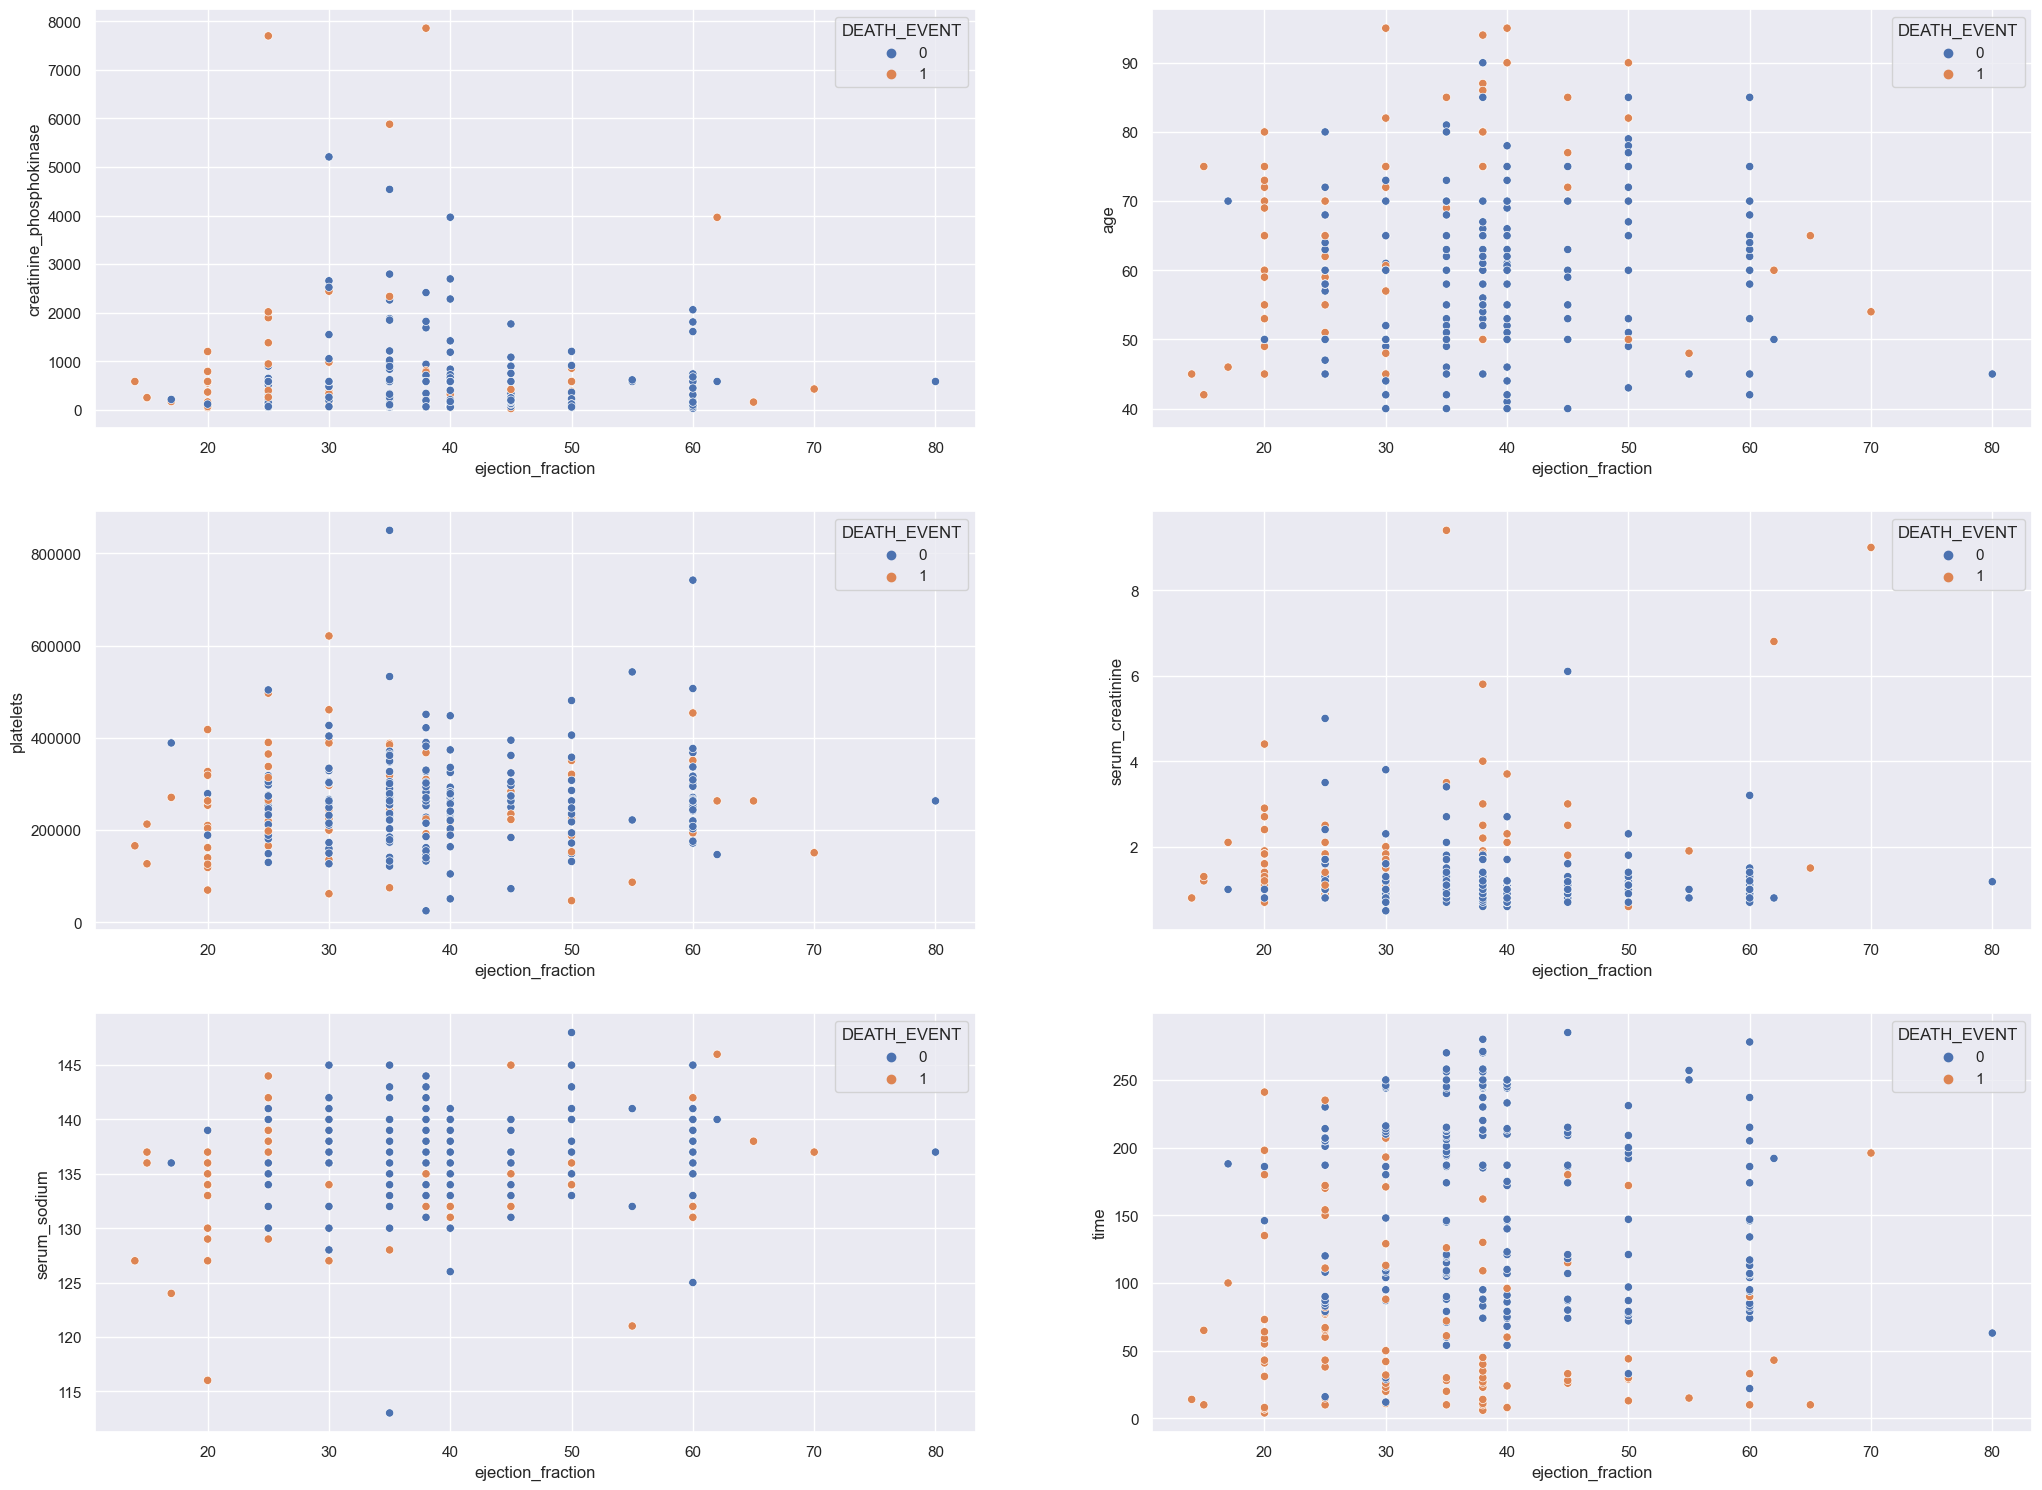

In [139]:
plt.figure(figsize = (25,25))

sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.scatterplot(data=data,x='ejection_fraction',y='creatinine_phosphokinase',hue='DEATH_EVENT')

plt.subplot(4,2,2)
sns.scatterplot(data=data,x='ejection_fraction',y='age',hue='DEATH_EVENT')


plt.subplot(4,2,3)
sns.scatterplot(data=data,x='ejection_fraction',y='platelets',hue='DEATH_EVENT')


plt.subplot(4,2,4)
sns.scatterplot(data=data,x='ejection_fraction',y='serum_creatinine',hue='DEATH_EVENT')


plt.subplot(4,2,5)
sns.scatterplot(data=data,x='ejection_fraction',y='serum_sodium',hue='DEATH_EVENT')

plt.subplot(4,2,6)
sns.scatterplot(data=data,x='ejection_fraction',y='time',hue='DEATH_EVENT')


In [12]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


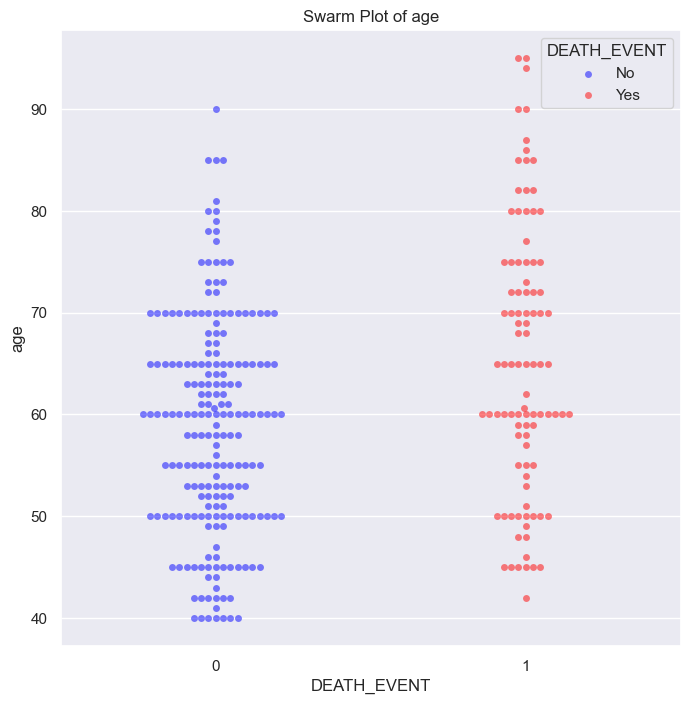

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


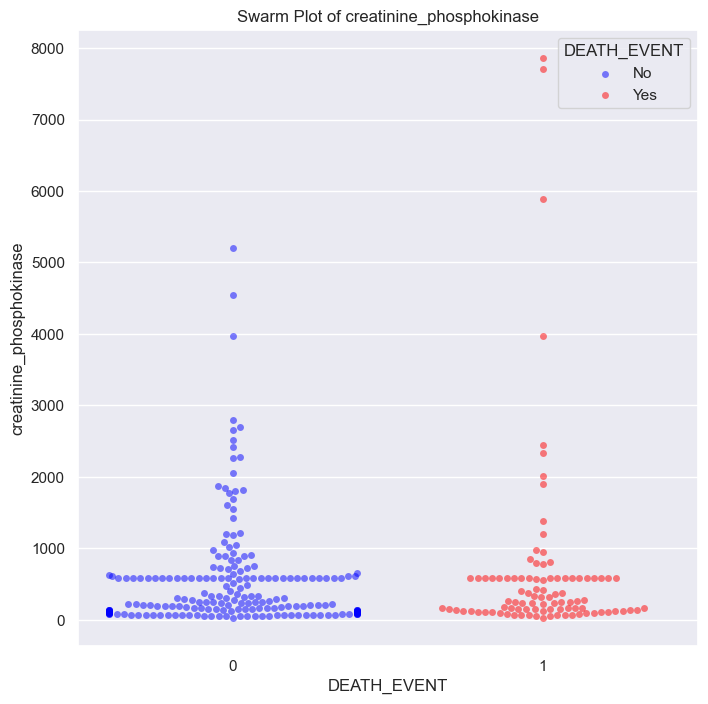

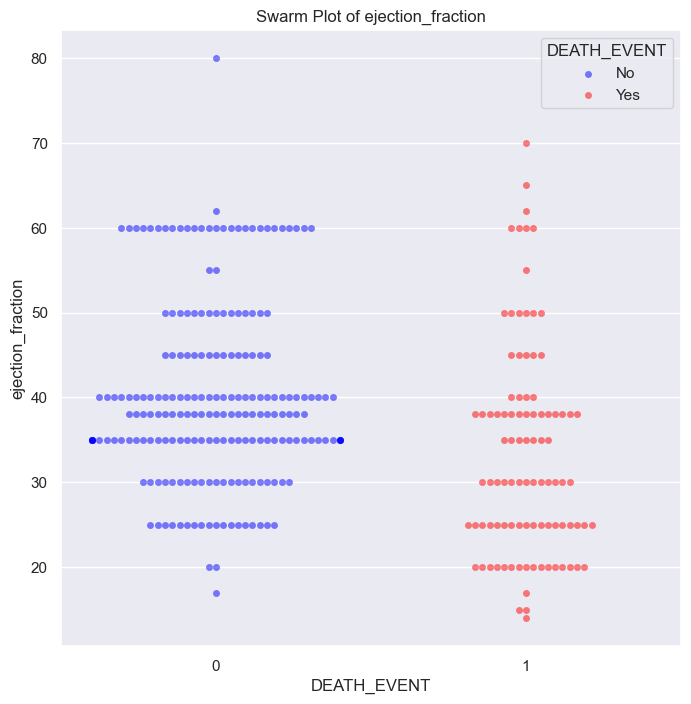

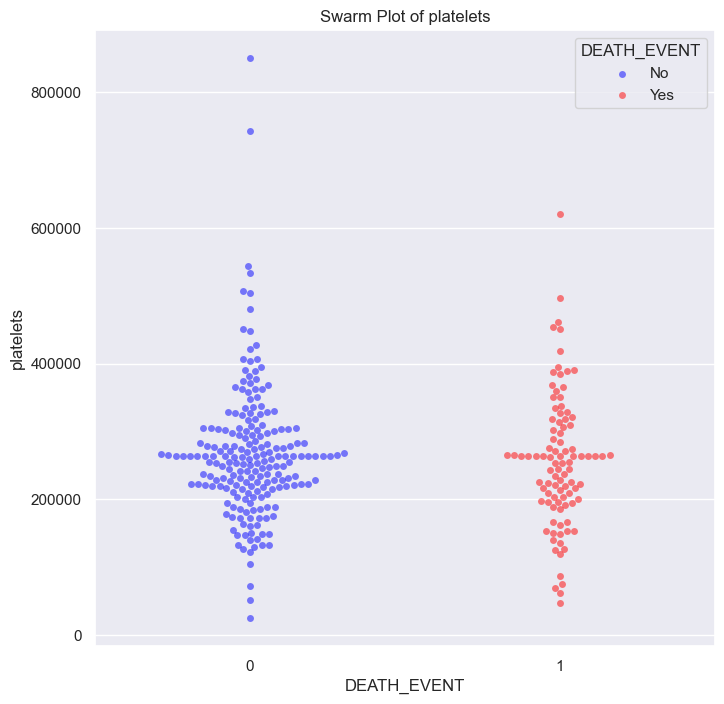

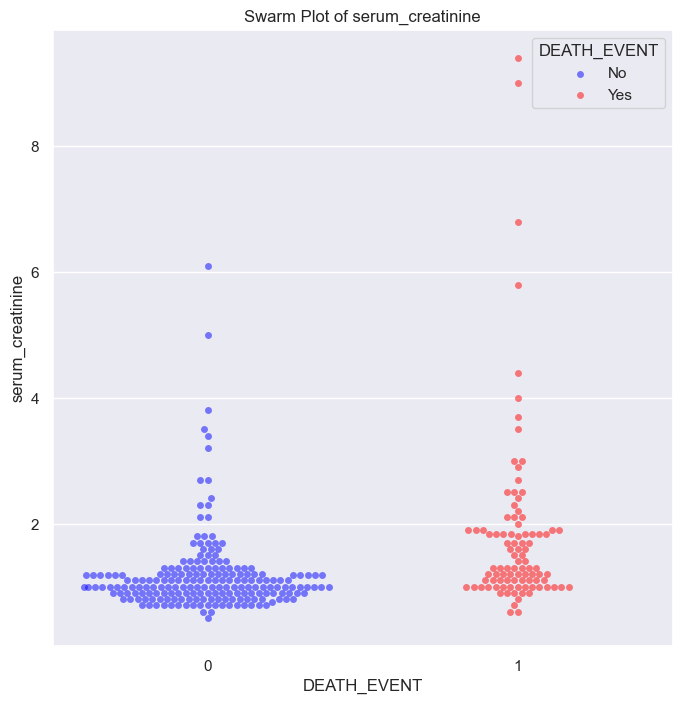

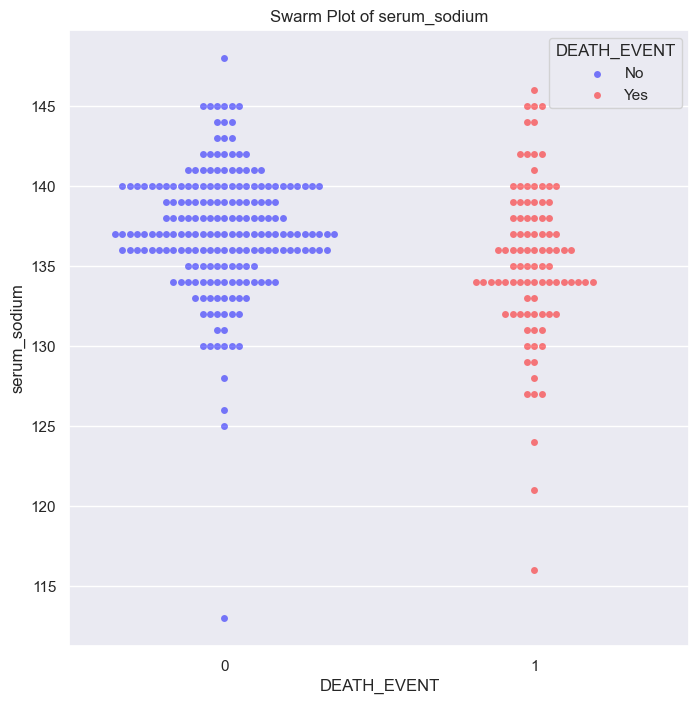

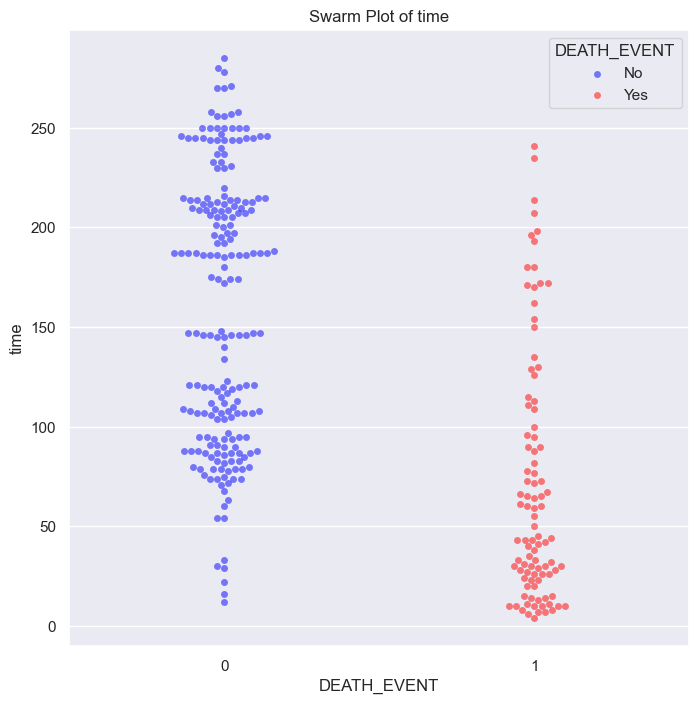

In [13]:
# Colors for swarm plot points
colors = {0: 'blue', 1: 'red'}

# Features to visualize
features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

# Create individual plots for each feature
for feature in features:
    plt.figure(figsize=(8, 8))
    
    # Create swarm plot with two colors
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[feature], palette=colors, alpha=0.5)
    
    # Set the colors of the swarm plot points
    for i, point_collection in enumerate(plt.gca().collections):
        point_collection.set_color(colors[i])
    
    plt.xlabel("DEATH_EVENT")
    plt.ylabel(feature)
    plt.title(f"Swarm Plot of {feature}")
    plt.legend(title="DEATH_EVENT", labels=["No", "Yes"])
    plt.show()

I spotted outliers on our dataset. I didn't remove them yet as it may lead to overfitting. Though we may end up with better statistics. In this case, with medical data, the outliers may be an important deciding factor.



In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [124]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [125]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [126]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [127]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

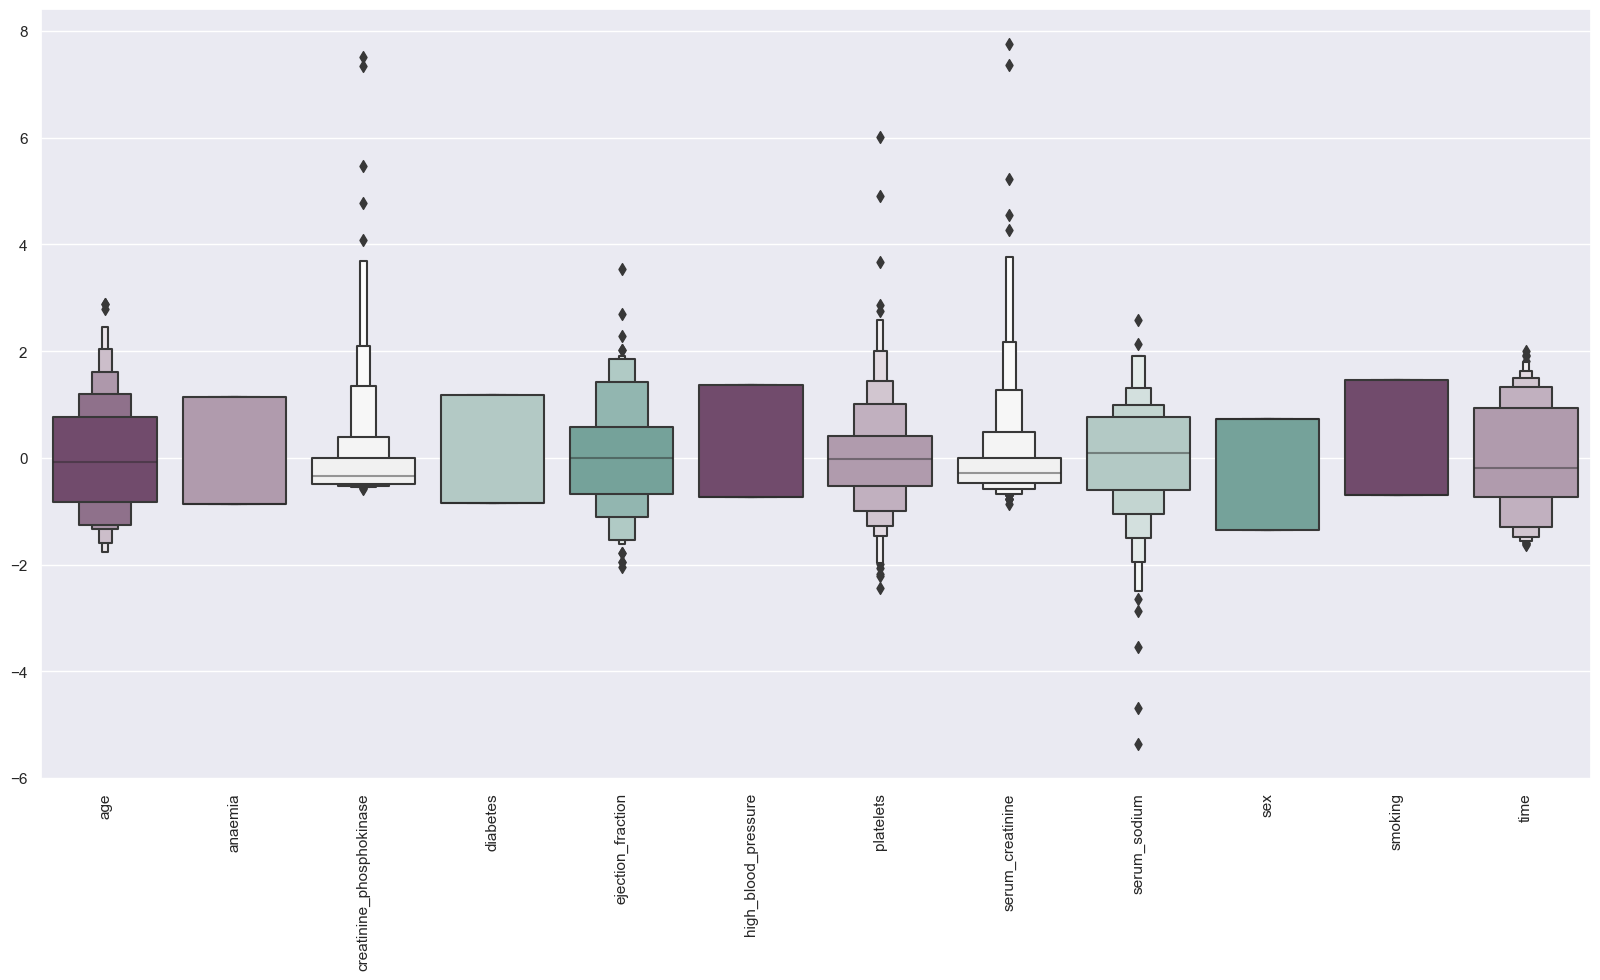

In [128]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

In [129]:
import tensorflow as tf

In [130]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)
## early stopping is a technique& when it's no longer improving, which can help prevent overfitting and save time.

In [131]:
# Initialising the NN
model = Sequential()


In [132]:
# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#The kernel initializer is like a recipe for how these starting points (weights) should be set.

In [133]:

# Train the ANN
history= model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
7/7 [==============================] - 1s 52ms/step - loss: 0.6927 - accuracy: 0.6567 - val_loss: 0.6933 - val_accuracy: 0.4783
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6916 - accuracy: 0.6716 - val_loss: 0.6935 - val_accuracy: 0.4783
Epoch 3/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6905 - accuracy: 0.6716 - val_loss: 0.6936 - val_accuracy: 0.4783
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6894 - accuracy: 0.6716 - val_loss: 0.6938 - val_accuracy: 0.4783
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.6716 - val_loss: 0.6940 - val_accuracy: 0.4783
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6871 - accuracy: 0.6716 - val_loss: 0.6942 - val_accuracy: 0.4783
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6858 - accuracy: 0.6716 - val_loss: 0.6943 - val_accuracy: 0.4783
Epoch 8/500
7/7 [=====

In [ ]:
#The validation loss (0.5327 in your case) is a measure of how well the model is performing on this unseen data.
#It should ideally be close to the training loss, but if it's significantly higher, it might indicate overfitting

In [134]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


3/3 [==============================] - 0s 8ms/step - loss: 0.3704 - accuracy: 0.8533
Test Loss: 0.3703664541244507, Test Accuracy: 0.8533333539962769


**Plotting training and validation loss over epochs**

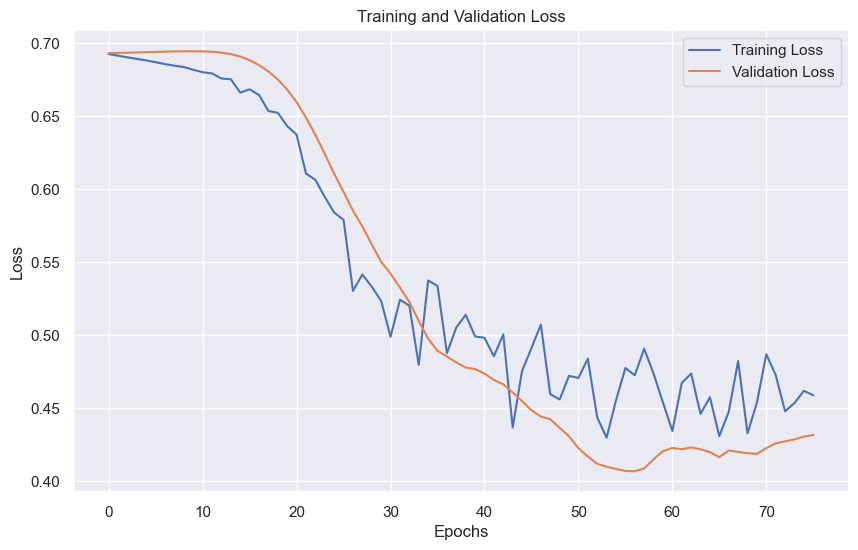

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

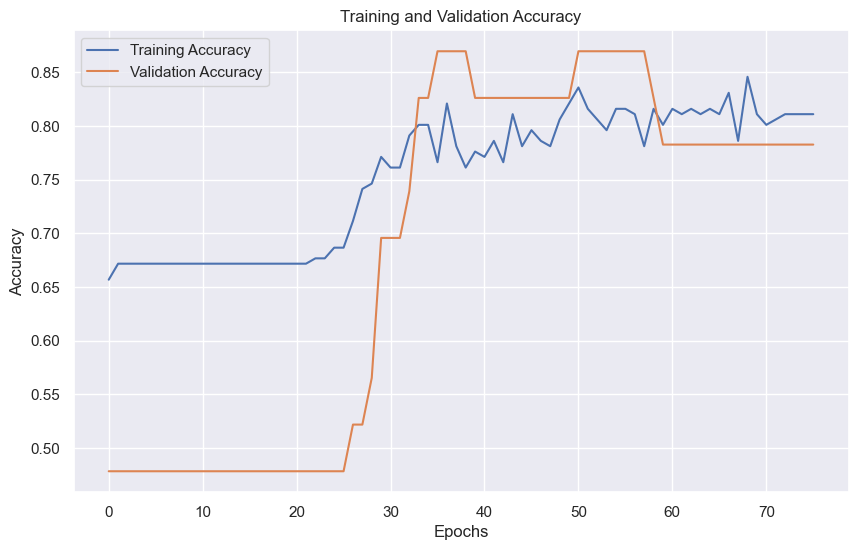

In [136]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [137]:
y_train_pred = (model.predict(X_train) >= 0.5).astype(int)
y_test_pred = (model.predict(X_test) >= 0.5).astype(int)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Print classification reports
print("Classification Report - Train Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

3/3 [==============================] - 0s 0s/step - loss: 0.3704 - accuracy: 0.8533
Test Loss: 0.3704, Test Accuracy: 0.8533
Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       146
           1       0.82      0.77      0.79        78

    accuracy                           0.86       224
   macro avg       0.85      0.84      0.85       224
weighted avg       0.86      0.86      0.86       224


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        57
           1       0.71      0.67      0.69        18

    accuracy                           0.85        75
   macro avg       0.80      0.79      0.80        75
weighted avg       0.85      0.85      0.85        75



 # **<span style="color:#6daa9f;">Conclusion</span>**

* People with Low Ejection_Fraction Have Higher Chances Of death from heart failure
* People Who are 50 to 70 years old are more likely to die from heart failure
* people who have greater than 2 serum_creatinine have higher chances of death from heart failure
* people who have low Ejection_Fraction and platelets have higher chances of death from heart failure
* people who have low Ejection_Fraction and greater than 2 serum_creatinine have higher chances of death from heart failure